<a href="https://colab.research.google.com/github/seunghee-lee/Portfolio/blob/main/Financial_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Kospi 자료 수집 및 분석

In [2]:
!pip install -U finance-datareader
!pip install pandas-datareader
!pip install yfinance

In [3]:
!pip install --upgrade yfinance

In [4]:
import FinanceDataReader as fdr
import yfinance as yf
import seaborn as sns
import math
import pandas_datareader as pdr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from datetime import datetime

In [5]:
# Set the start and end date
start_date = '2000-01-01'
end_date = '2025-09-06'

In [6]:
# 주가 데이터를 불러옴
# (yahoo finance open API, 공식적으로 없어졌지만, 비공식적으로 서비스는 제공되고 있음)

# Get the data
data1 = yf.download('^KS11', start_date, end_date)

/tmp/ipython-input-847437481.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data1 = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed


In [7]:
# Print 5 rows
data1.tail()

Price,Close,High,Low,Open,Volume
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11
Date,,,,,
2025-09-01,3142.929932,3177.399902,3135.020020,3164.580078,260100
2025-09-02,3172.350098,3174.159912,3151.929932,3155.729980,310700
2025-09-03,3184.419922,3187.479980,3167.229980,3177.750000,335800
2025-09-04,3200.830078,3205.610107,3185.489990,3188.840088,286300
2025-09-05,3205.120117,3214.639893,3196.189941,3208.830078,323800


In [8]:
data2 = fdr.DataReader('ks11', '2000')  #investing.com에서 코드를 확인하고 입력
data2.tail()

,Open,High,Low,Close,Volume,Change,UpDown,Comp,Amount,MarCap
Date,,,,,,,,,,
2025-09-01,3164.58,3177.40,3135.02,3142.93,260138455,-0.0135,2,-43.08,8003230744765,2.583440e+15
2025-09-02,3155.73,3174.16,3151.93,3172.35,310678131,0.0094,1,29.42,8676467905841,2.608214e+15
2025-09-03,3177.75,3187.48,3167.23,3184.42,335816449,0.0038,1,12.07,8811868562778,2.618479e+15
2025-09-04,3188.84,3205.61,3185.49,3200.83,286255881,0.0052,1,16.41,7977947156742,2.631603e+15
2025-09-05,3208.83,3214.64,3196.19,3205.12,323844686,0.0013,1,4.29,10942042116464,2.636841e+15


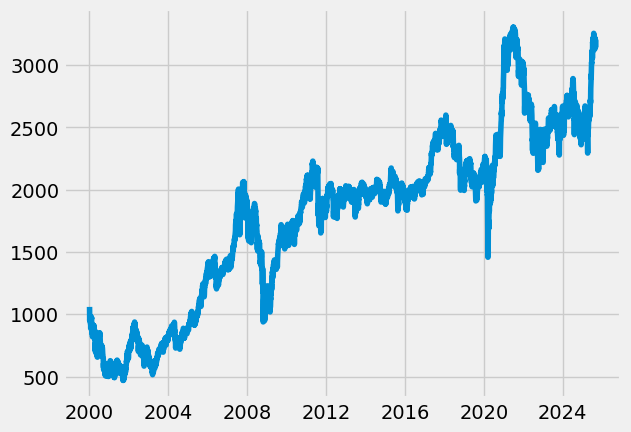

In [9]:
datag1=data1[['Close']]
plt.plot(datag1)

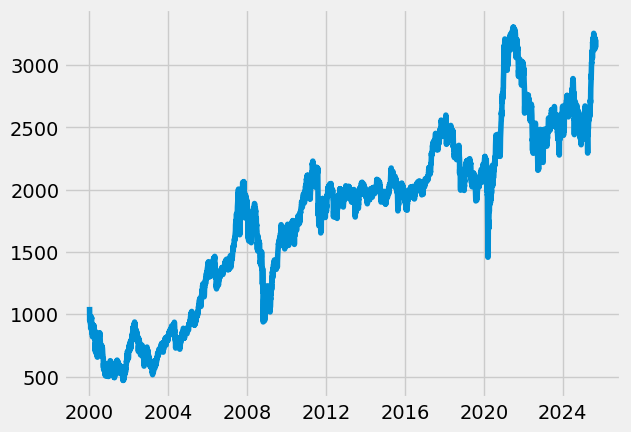

In [10]:
datag2=data2[['Close']]
plt.plot(datag2)

In [11]:
Kospi=data1

In [12]:
Kospi['Return']=np.log(Kospi['Close']/Kospi['Close'].shift(1))

In [13]:
Kospi.tail()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2025-09-01,3142.929932,3177.399902,3135.020020,3164.580078,260100,-0.013614
2025-09-02,3172.350098,3174.159912,3151.929932,3155.729980,310700,0.009317
2025-09-03,3184.419922,3187.479980,3167.229980,3177.750000,335800,0.003797
2025-09-04,3200.830078,3205.610107,3185.489990,3188.840088,286300,0.005140
2025-09-05,3205.120117,3214.639893,3196.189941,3208.830078,323800,0.001339


In [14]:
Kospi.head()

Price,Close,High,Low,Open,Volume,Return
Ticker,^KS11,^KS11,^KS11,^KS11,^KS11,
Date,,,,,,
2000-01-04,1059.040039,1066.180054,1016.590027,1028.329956,195900,NaN
2000-01-05,986.309998,1026.520020,984.049988,1006.869995,257700,-0.071147
2000-01-06,960.789978,1014.900024,953.500000,1013.950012,203500,-0.026215
2000-01-07,948.650024,970.159973,930.840027,949.169983,215700,-0.012716
2000-01-10,987.239990,994.940002,974.820007,979.669983,240200,0.039873


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

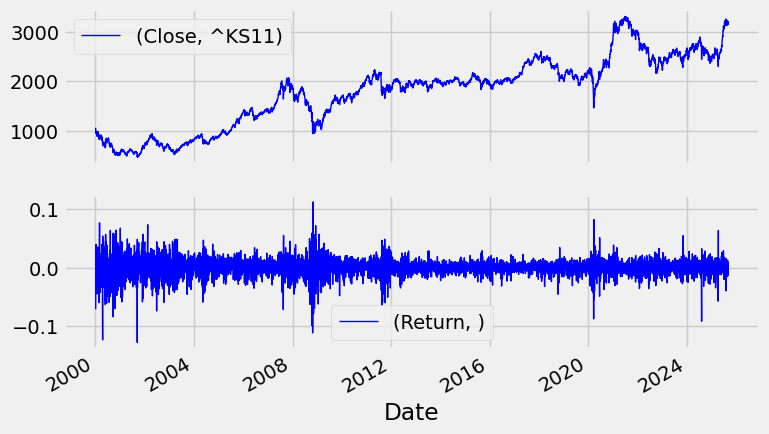

In [15]:
Kospi[['Close','Return']].plot(subplots=True, style='b', lw='1', figsize=(8,5))

In [16]:
Kospi['40d']=Kospi['Close'].rolling(window=40).mean()
Kospi['240d']=Kospi['Close'].rolling(window=240).mean()

In [17]:
Kospi[['Close', '40d', '240d']].tail()

Price,Close,40d,240d
Ticker,^KS11,,
Date,,,
2025-09-01,3142.929932,3184.024249,2690.212292
2025-09-02,3172.350098,3186.846252,2692.327793
2025-09-03,3184.419922,3188.583002,2694.842876
2025-09-04,3200.830078,3190.260254,2697.448418
2025-09-05,3205.120117,3190.807507,2700.201919


<Axes: xlabel='Date'>

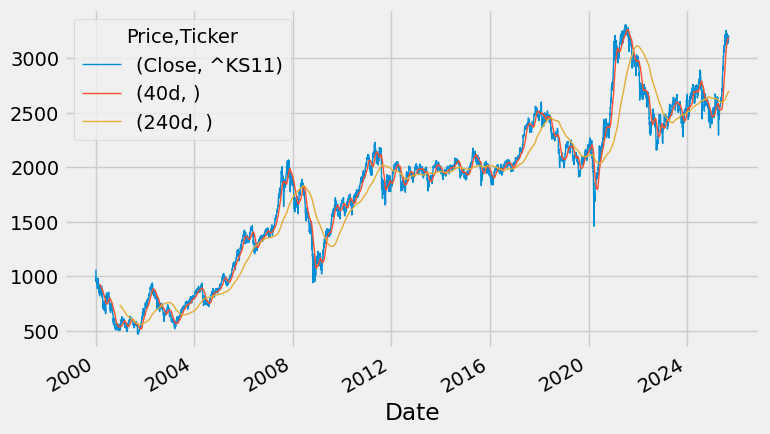

In [18]:
Kospi[['Close', '40d', '240d']].plot(lw='1', figsize=(8,5))

In [19]:
Kospi['Mov_vol']=Kospi['Return'].rolling(window=245).std()*math.sqrt(245)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

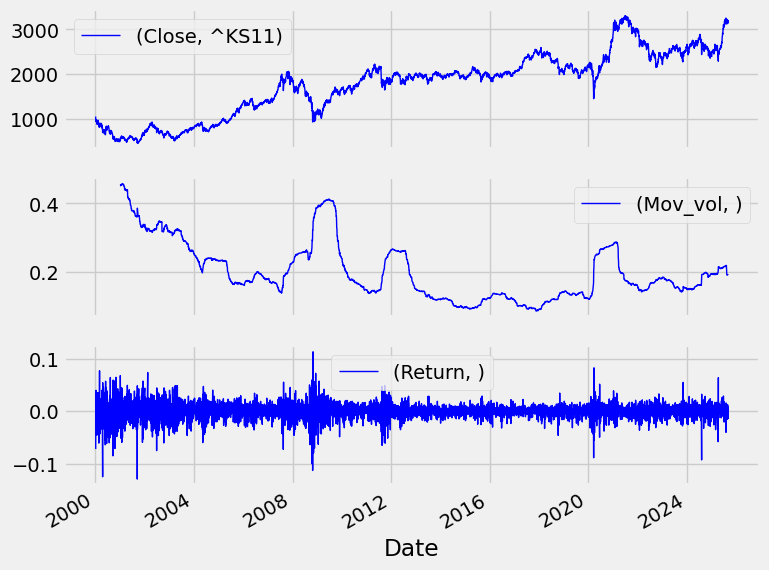

In [20]:
Kospi[['Close','Mov_vol', 'Return']].plot(subplots=True, style='b', lw='1', figsize=(8,7))

#### 주요 주가지수 분석

In [21]:
kospi = yf.download('^KS11', start_date, end_date)
snp = yf.download('^GSPC',start_date, end_date) #S&P500
nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100

/tmp/ipython-input-3965347332.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  kospi = yf.download('^KS11', start_date, end_date)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  snp = yf.download('^GSPC',start_date, end_date) #S&P500
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  nikkei = yf.download('^N225',start_date, end_date) # Nikkei 225
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3965347332.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  euronext = yf.download('^N100',start_date, end_date) # EURONEXT 100
[*********************100%***********************]  1 of 1 completed


In [22]:
snp.head()

Price,Close,High,Low,Open,Volume
Ticker,^GSPC,^GSPC,^GSPC,^GSPC,^GSPC
Date,,,,,
2000-01-03,1455.219971,1478.000000,1438.359985,1469.250000,931800000
2000-01-04,1399.420044,1455.219971,1397.430054,1455.219971,1009000000
2000-01-05,1402.109985,1413.270020,1377.680054,1399.420044,1085500000
2000-01-06,1403.449951,1411.900024,1392.099976,1402.109985,1092300000
2000-01-07,1441.469971,1441.469971,1400.729980,1403.449951,1225200000


In [23]:
# 지수 자료를 병합
eqt1 = pd.merge(snp['Close'], kospi['Close'],left_index=True, right_index=True, how='inner')
eqt1.columns=['SP500','KOSPI']

eqt2 = pd.merge(nikkei['Close'], euronext['Close'],left_index=True, right_index=True, how='inner')
eqt2.columns=['Nikkei','Euronext']

eqt3 = pd.merge(eqt1, eqt2,left_index=True, right_index=True, how='inner')

In [24]:
eqt3.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [25]:
rtn= ( np.log(eqt3) - np.log(eqt3.shift(1)) )*100
rtn.columns=['r_sp','r_kp','r_nk','r_ux']
rtn.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


In [26]:
eqt = pd.merge(eqt3,rtn,left_index=True, right_index=True, how='inner')
eqt.head()

,SP500,KOSPI,Nikkei,Euronext,r_sp,r_kp,r_nk,r_ux
Date,,,,,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971,NaN,NaN,NaN,NaN
2000-01-05,1402.109985,986.309998,18542.550781,930.260010,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,1403.449951,960.789978,18168.269531,922.460022,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,1441.469971,948.650024,18193.410156,943.880005,2.672995,-1.271589,0.138281,2.295501
2000-01-11,1438.560059,981.330017,18850.919922,954.059998,-0.202075,3.386886,3.550227,1.072752


In [27]:
pr = eqt[['SP500', 'KOSPI', 'Nikkei','Euronext']]
pr.head()

,SP500,KOSPI,Nikkei,Euronext
Date,,,,
2000-01-04,1399.420044,1059.040039,19002.859375,955.969971
2000-01-05,1402.109985,986.309998,18542.550781,930.260010
2000-01-06,1403.449951,960.789978,18168.269531,922.460022
2000-01-07,1441.469971,948.650024,18193.410156,943.880005
2000-01-11,1438.560059,981.330017,18850.919922,954.059998


In [28]:
rt = eqt[['r_sp','r_kp','r_nk','r_ux']]
rt.head()

,r_sp,r_kp,r_nk,r_ux
Date,,,,
2000-01-04,NaN,NaN,NaN,NaN
2000-01-05,0.192034,-7.114745,-2.452133,-2.726237
2000-01-06,0.095522,-2.621486,-2.039149,-0.842009
2000-01-07,2.672995,-1.271589,0.138281,2.295501
2000-01-11,-0.202075,3.386886,3.550227,1.072752


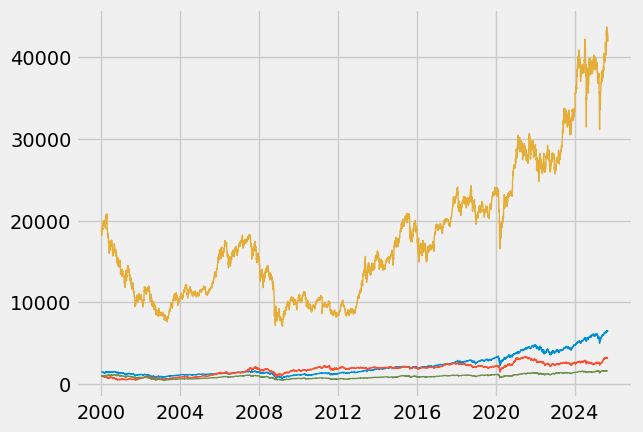

In [29]:
# 원 자료로 그림을 그려 봄
plt.plot(pr, lw='1')

In [30]:
# 초기시점을 0 으로 기준으로 잡고 상대 주가(relative stock price)를 표현
pr_0 = pr / pr.iloc[0] - 1.0

<Axes: xlabel='Date'>

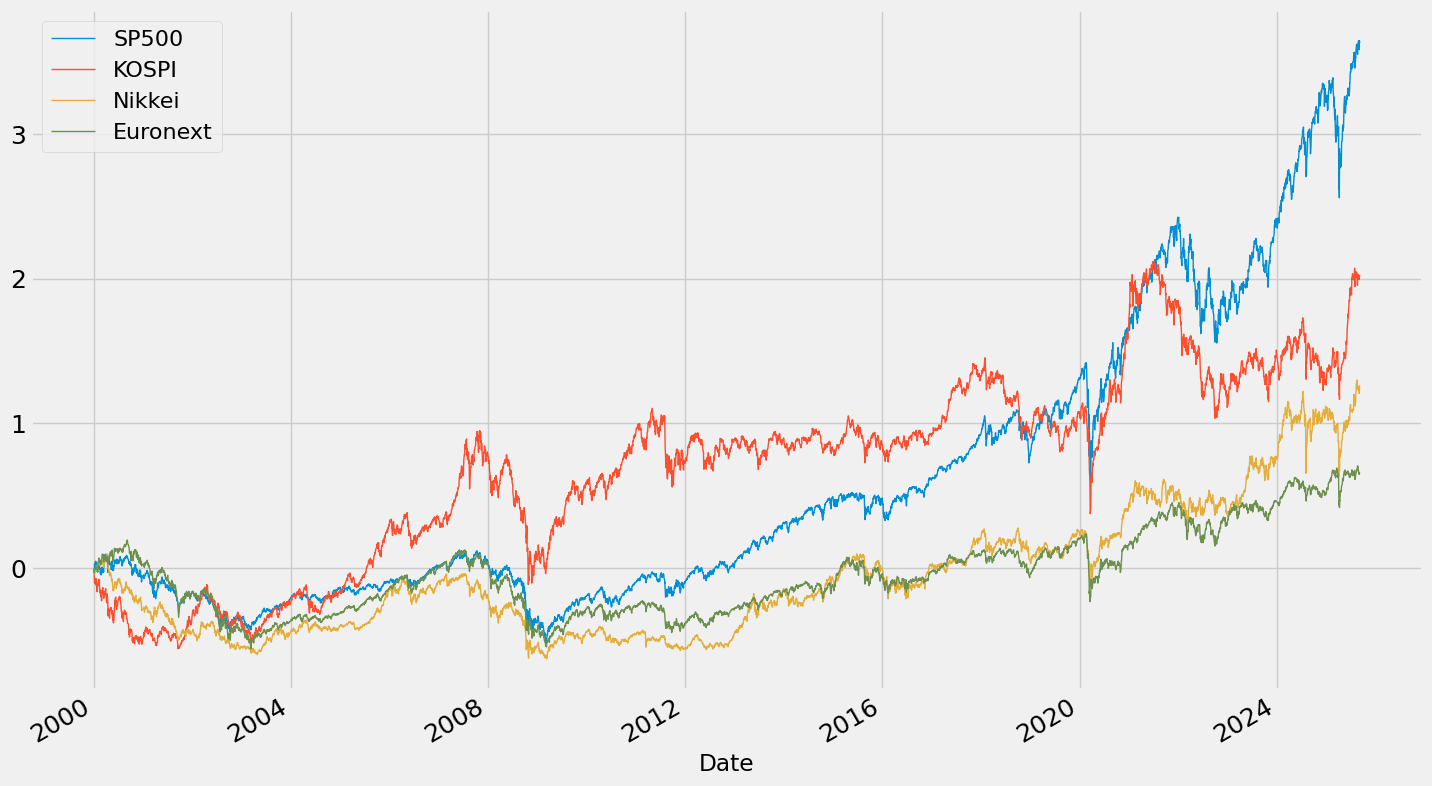

In [31]:
# 상대가격을 그래프로 표현
plt.rcParams['legend.fontsize'] = 16
pr_0.plot( figsize=(16,10), fontsize=18, lw='1')

<Axes: xlabel='Date'>

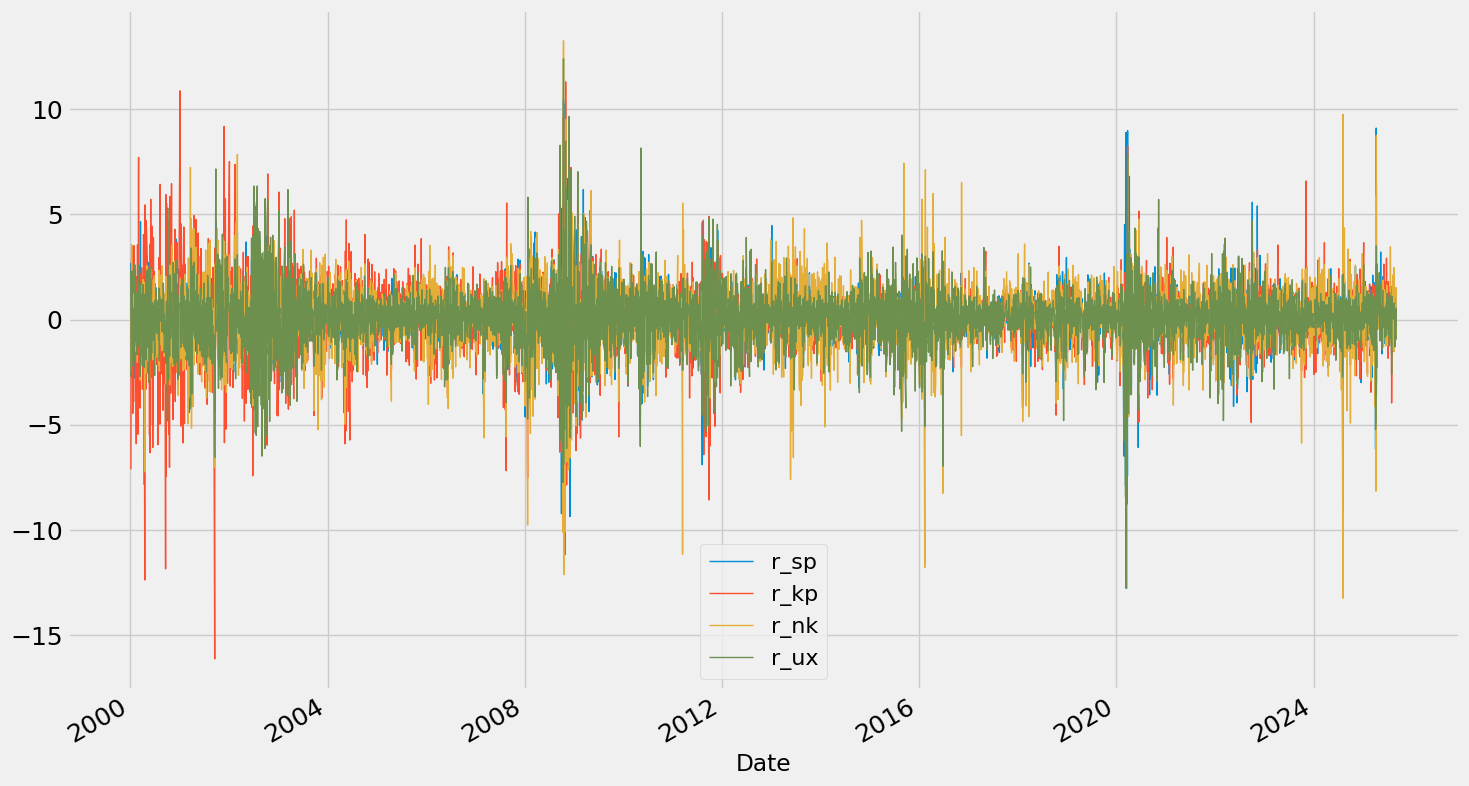

In [32]:
#  수익률 그래프도 표현
plt.rcParams['legend.fontsize'] = 16
rt.plot( figsize=(16,10), lw='1', fontsize=18)

In [35]:
pr.describe()

,SP500,KOSPI,Nikkei,Euronext
count,5763.000000,5763.000000,5763.000000,5763.000000
mean,2207.330898,1786.648721,17830.211193,913.028127
std,1372.213394,695.675024,8311.864647,269.675301
min,676.530029,468.760010,7054.979980,419.950012
25%,1206.544983,1262.604980,10868.685059,691.864990
50%,1509.650024,1942.410034,16008.139648,878.700012
75%,2837.089966,2248.250000,22090.649414,1058.395020
max,6502.080078,3305.209961,43714.308594,1631.550049


In [34]:
rt.describe()

,r_sp,r_kp,r_nk,r_ux
count,5762.000000,5762.000000,5762.000000,5762.000000
mean,0.026604,0.019219,0.014180,0.008747
std,1.284382,1.522448,1.538437,1.341855
min,-12.765220,-16.115370,-13.234076,-12.751740
25%,-0.488813,-0.630879,-0.731706,-0.597485
50%,0.071000,0.073056,0.054142,0.060534
75%,0.613274,0.762212,0.834900,0.657512
max,10.423562,11.284352,13.234592,12.378520


In [36]:
print(rt.describe())
print('skeness: ', rt.skew(axis=0))
print('kurtosis: ', rt.kurtosis(axis=0))

              r_sp         r_kp         r_nk         r_ux
count  5762.000000  5762.000000  5762.000000  5762.000000
mean      0.026604     0.019219     0.014180     0.008747
std       1.284382     1.522448     1.538437     1.341855
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.488813    -0.630879    -0.731706    -0.597485
50%       0.071000     0.073056     0.054142     0.060534
75%       0.613274     0.762212     0.834900     0.657512
max      10.423562    11.284352    13.234592    12.378520
skeness:  r_sp   -0.403887
r_kp   -0.600034
r_nk   -0.472765
r_ux   -0.152625
dtype: float64
kurtosis:  r_sp    10.050017
r_kp     9.066130
r_nk     7.376514
r_ux     7.427969
dtype: float64


In [37]:
# 우리가 원하는 통계량이 모두 포함된 기초통계표를 만들음
df=pr
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              SP500          KOSPI        Nikkei      Euronext
count  5.763000e+03    5763.000000  5.763000e+03   5763.000000
mean   2.207331e+03    1786.648721  1.783021e+04    913.028127
std    1.372213e+03     695.675024  8.311865e+03    269.675301
min    6.765300e+02     468.760010  7.054980e+03    419.950012
25%    1.206545e+03    1262.604980  1.086869e+04    691.864990
50%    1.509650e+03    1942.410034  1.600814e+04    878.700012
75%    2.837090e+03    2248.250000  2.209065e+04   1058.395020
max    6.502080e+03    3305.209961  4.371431e+04   1631.550049
var    1.882970e+06  483963.738891  6.908709e+07  72724.768238
skew   1.261835e+00      -0.193895  1.031072e+00      0.613138
kurt   6.079126e-01      -0.761934  3.681823e-01     -0.287782


In [38]:
df=rt
stats = df.describe()
stats.loc['var'] = df.var().tolist()
stats.loc['skew'] = df.skew().tolist()
stats.loc['kurt'] = df.kurtosis().tolist()
print(stats)

              r_sp         r_kp         r_nk         r_ux
count  5762.000000  5762.000000  5762.000000  5762.000000
mean      0.026604     0.019219     0.014180     0.008747
std       1.284382     1.522448     1.538437     1.341855
min     -12.765220   -16.115370   -13.234076   -12.751740
25%      -0.488813    -0.630879    -0.731706    -0.597485
50%       0.071000     0.073056     0.054142     0.060534
75%       0.613274     0.762212     0.834900     0.657512
max      10.423562    11.284352    13.234592    12.378520
var       1.649636     2.317848     2.366787     1.800575
skew     -0.403887    -0.600034    -0.472765    -0.152625
kurt     10.050017     9.066130     7.376514     7.427969


In [39]:
pr.corr()

,SP500,KOSPI,Nikkei,Euronext
SP500,1.000000,0.786892,0.966928,0.913169
KOSPI,0.786892,1.000000,0.728856,0.676950
Nikkei,0.966928,0.728856,1.000000,0.959525
Euronext,0.913169,0.676950,0.959525,1.000000


In [40]:
rt.corr()

,r_sp,r_kp,r_nk,r_ux
r_sp,1.000000,0.228644,0.198610,0.593683
r_kp,0.228644,1.000000,0.609601,0.377338
r_nk,0.198610,0.609601,1.000000,0.400667
r_ux,0.593683,0.377338,0.400667,1.000000


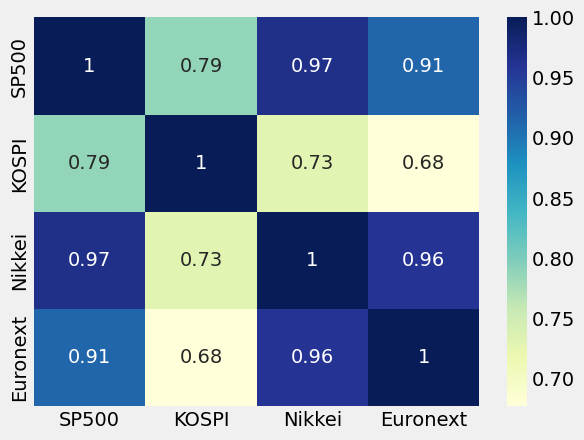

In [41]:
sns.heatmap(pr.corr(), annot=True, cmap="YlGnBu")
plt.show()

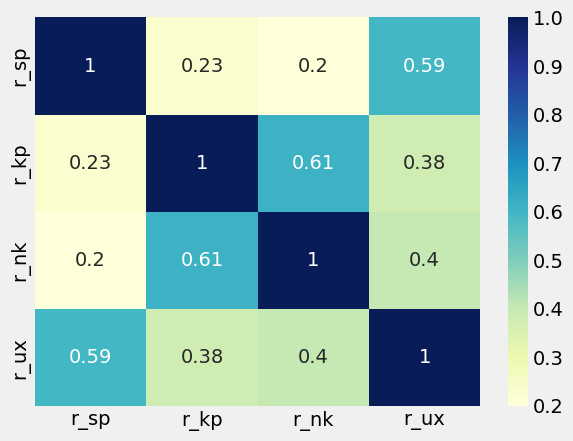

In [42]:
sns.heatmap(rt.corr(), annot=True, cmap="YlGnBu")
plt.show()

#### 회귀 분석

In [43]:
snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
vix = yf.download('^vix',start_date, end_date) #VIX 지수

/tmp/ipython-input-3458128986.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  snp = yf.download('^GSPC',start_date, end_date) #S&P500 지수
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-3458128986.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  vix = yf.download('^vix',start_date, end_date) #VIX 지수
[*********************100%***********************]  1 of 1 completed


In [44]:
data = pd.merge(snp['Close'], vix['Close'],left_index=True, right_index=True, how='inner')
data.columns=['SP500','VIX']

In [45]:
data.tail()

,SP500,VIX
Date,,
2025-08-29,6460.259766,15.36
2025-09-02,6415.540039,17.17
2025-09-03,6448.259766,16.35
2025-09-04,6502.080078,15.30
2025-09-05,6481.500000,15.18


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

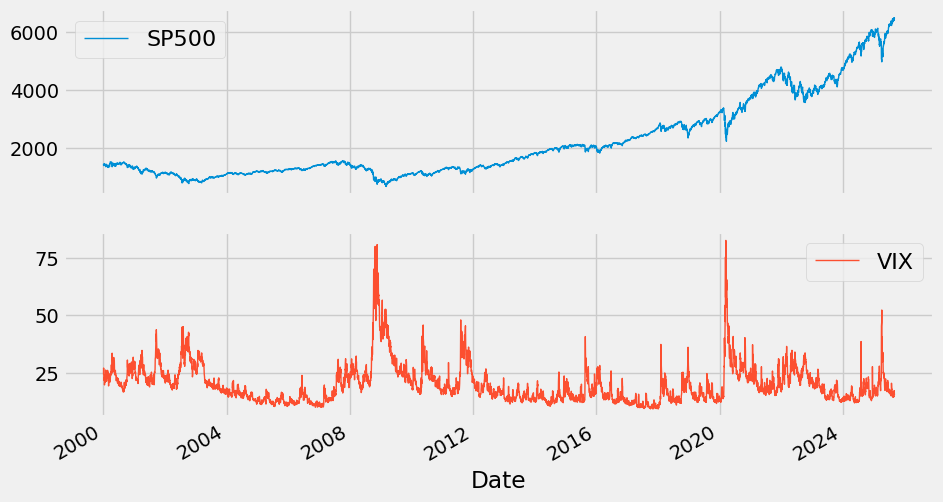

In [46]:
data.plot(subplots=True, figsize=(10, 6), lw='1')

<Axes: xlabel='Date'>

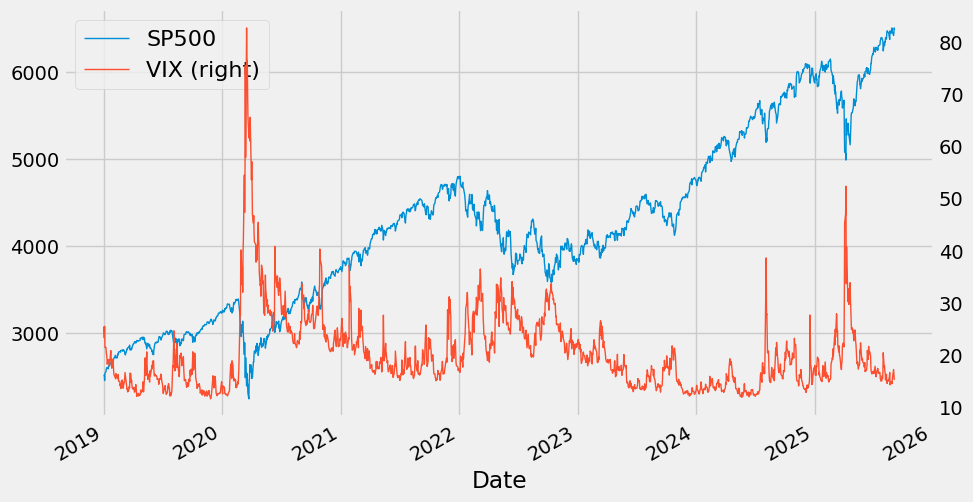

In [47]:
data.loc['2018-12-31':].plot(secondary_y='VIX', figsize=(10, 6), lw='1')

In [49]:
rets = np.log(data / data.shift(1))

In [50]:
rets.head()

,SP500,VIX
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.039099,0.109441
2000-01-05,0.001920,-0.022464
2000-01-06,0.000955,-0.026085
2000-01-07,0.026730,-0.169424


In [51]:
rets.dropna(inplace=True)

array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

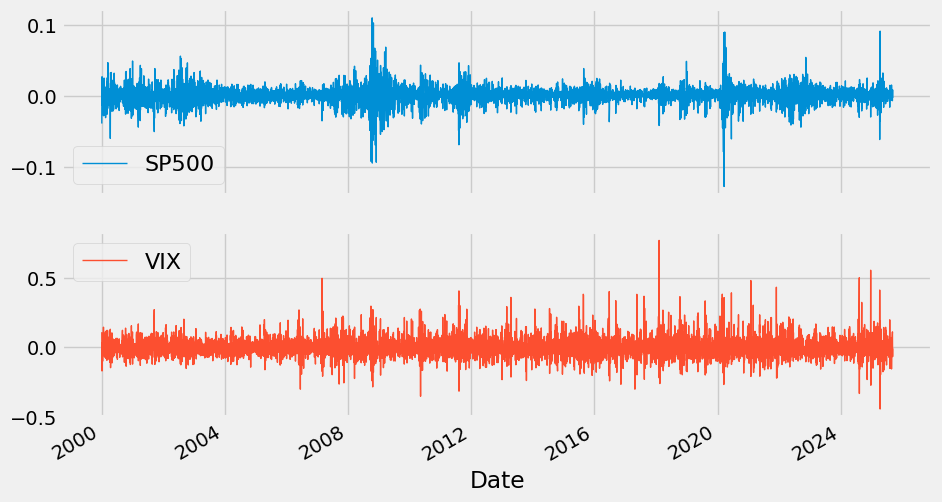

In [52]:
rets.plot(subplots=True, figsize=(10, 6), lw='1')

array([[<Axes: xlabel='SP500', ylabel='SP500'>,
        <Axes: xlabel='VIX', ylabel='SP500'>],
       [<Axes: xlabel='SP500', ylabel='VIX'>,
        <Axes: xlabel='VIX', ylabel='VIX'>]], dtype=object)

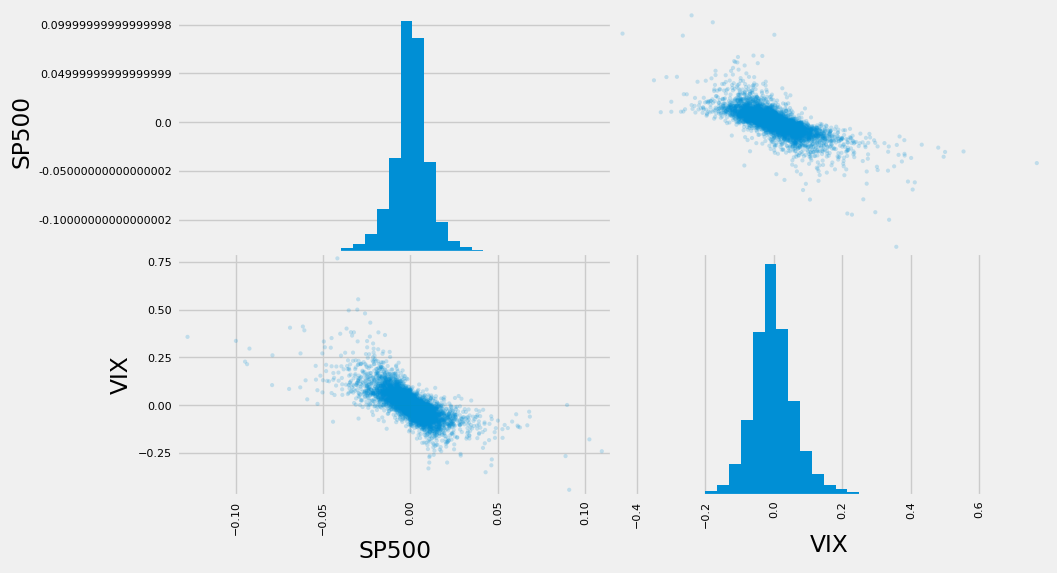

In [53]:
pd.plotting.scatter_matrix(rets,
                           alpha=0.2,
                           diagonal='hist',
                           hist_kwds={'bins': 35},
                           figsize=(10, 6))

In [54]:
reg = np.polyfit(rets['SP500'], rets['VIX'], deg=1)

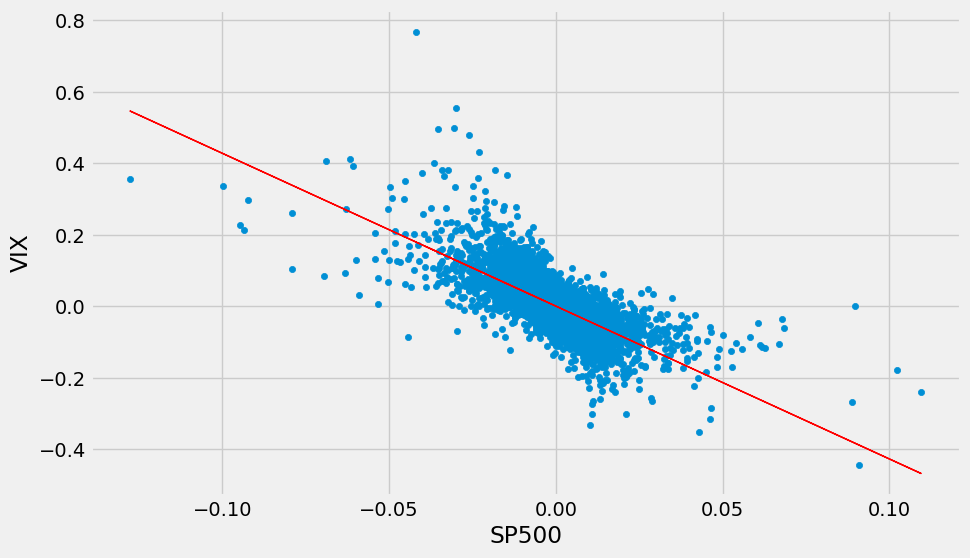

In [55]:
ax = rets.plot(kind='scatter', x='SP500', y='VIX', figsize=(10, 6))
ax.plot(rets['SP500'], np.polyval(reg, rets['SP500']), 'r', lw='1')

In [56]:
rets.corr()

,SP500,VIX
SP500,1.00000,-0.73221
VIX,-0.73221,1.00000


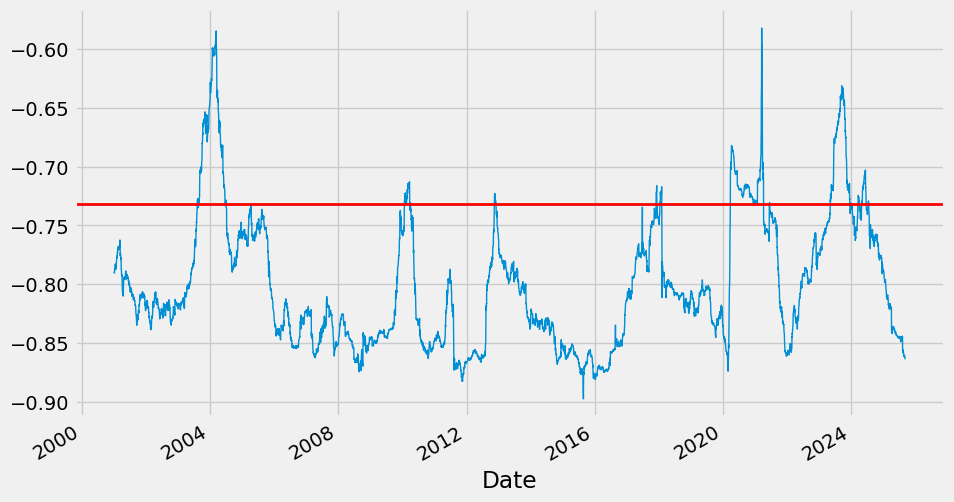

In [57]:
ax = rets['SP500'].rolling(window=252).corr(
                  rets['VIX']).plot(figsize=(10, 6), lw='1')
ax.axhline(rets.corr().iloc[0, 1], c='r', lw='2')